In [17]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import numpy as np
import os,sys
from sklearn.metrics import classification_report, confusion_matrix

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [18]:
import json
with open("Part1 - Car-Attributes.json") as file:
    data=json.load(file)
#f = open('Part1 - Car-Attributes.json',) 
#df = pd.read_csv('Part1 - Car-Attributes', delimiter=' *{} *', engine='python')
#df.head()

In [19]:
df1 = pd.read_json ('Part1 - Car-Attributes.json')
df2 = pd.read_csv('Part1 - Car name.csv')

In [20]:
df1.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [21]:
print(df1.shape)
print(df1.size)

(398, 8)
3184


In [22]:
print(df2.size)
print(df2.shape)
df2.head()

398
(398, 1)


,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [26]:
df=pd.concat([df2,df1],axis=1,sort=True)

In [27]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [28]:
df.to_csv ('Car Attributes.csv', index = None)
df.to_excel('Car Attributes.xlsx', index = None)
df.to_json('Car Attributes.json', orient='records',lines=True)

In [29]:
df = pd.read_csv('Car Attributes.csv')
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [30]:
copy_df = df
copy_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [31]:
copy_df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [33]:
#General attributes of the data 
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [49]:
copy_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


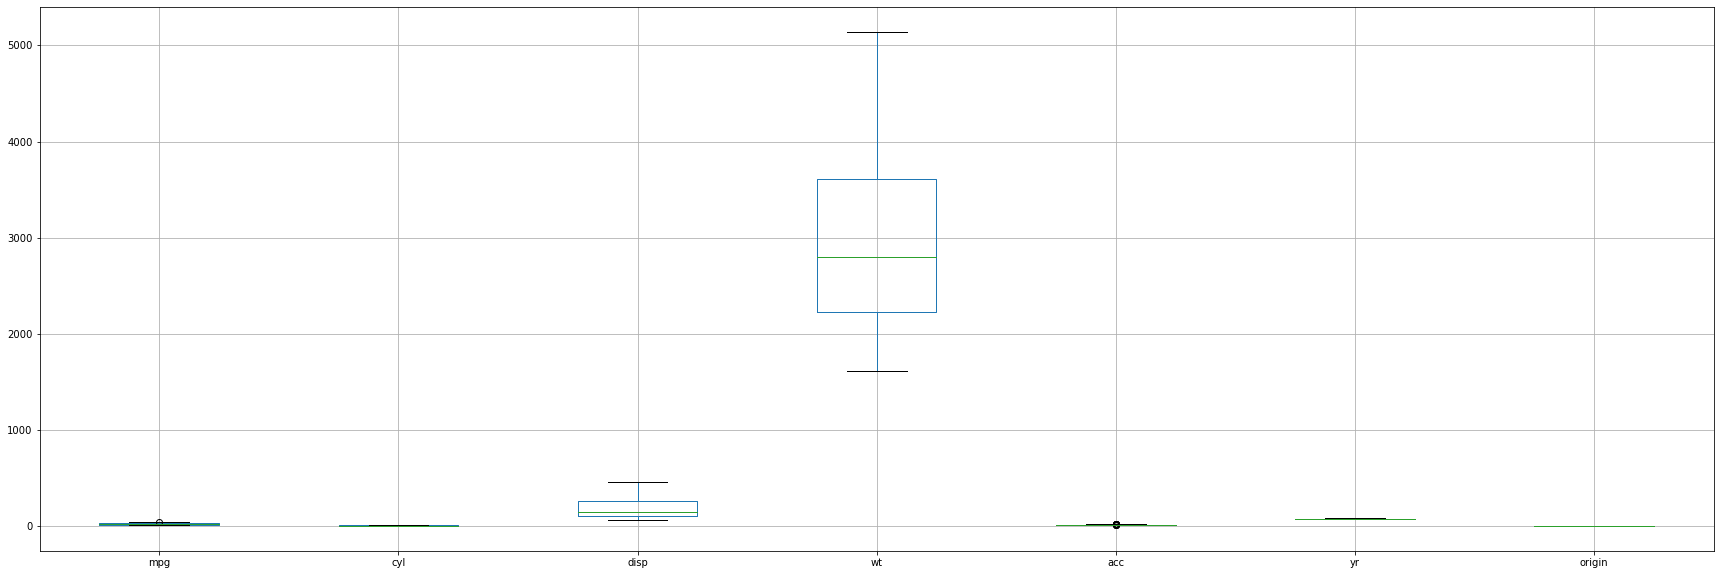

In [34]:
copy_df.boxplot(figsize=(30,10))

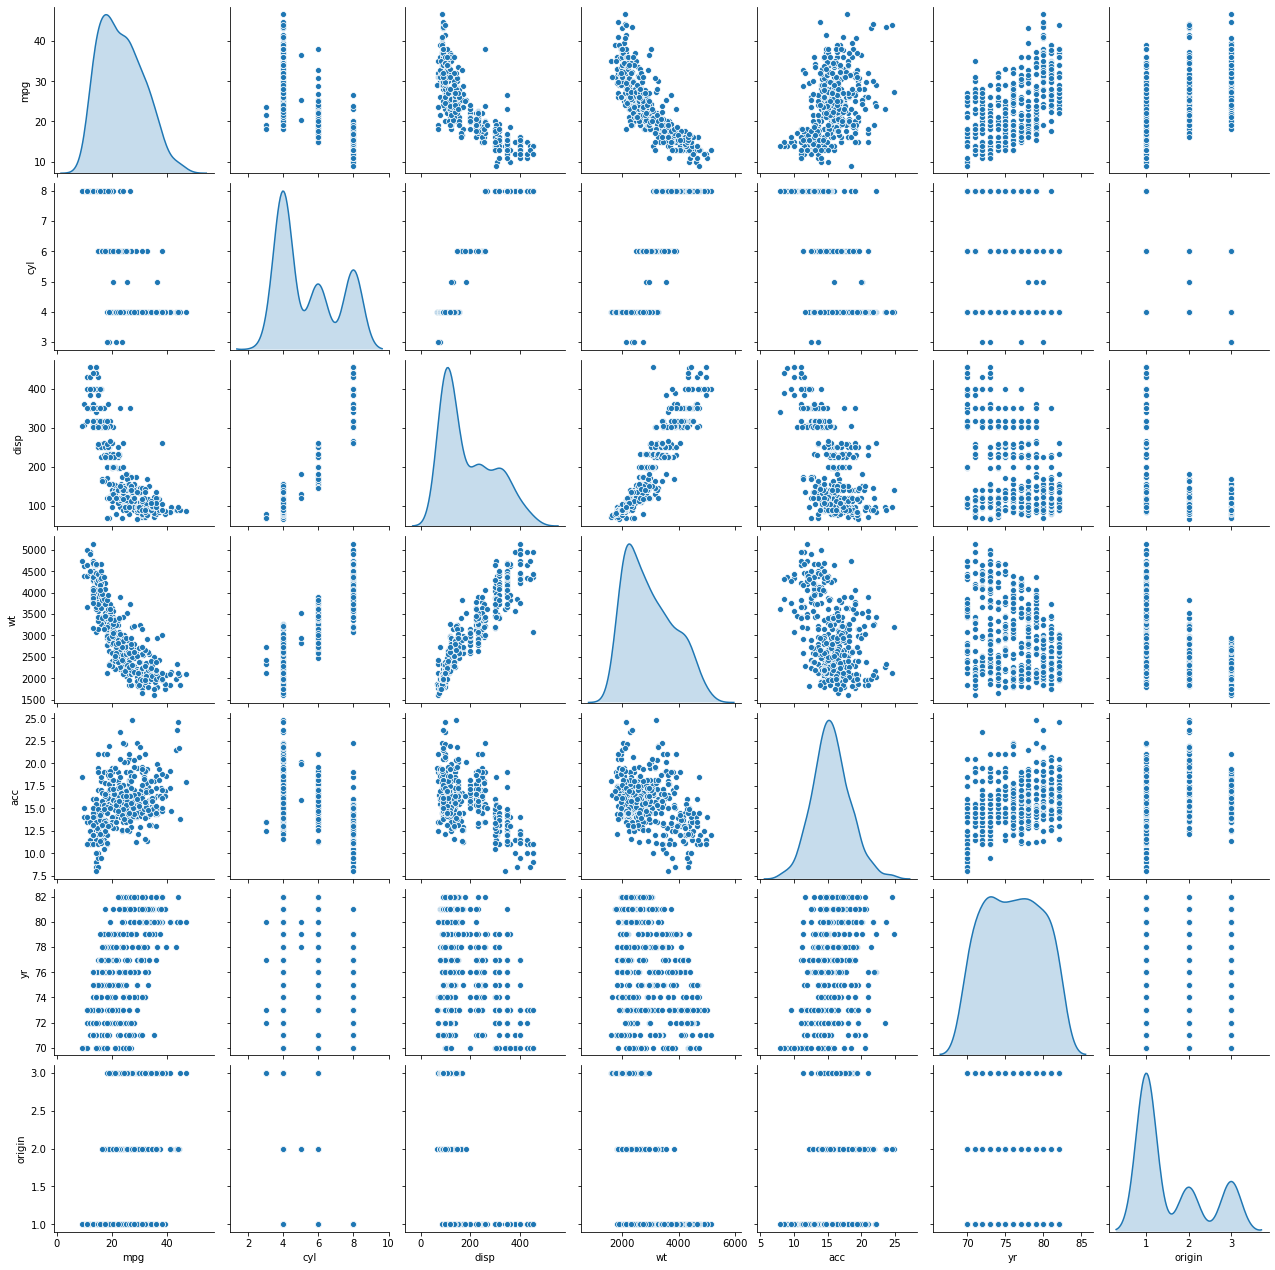

In [35]:
sns.pairplot(copy_df,diag_kind='kde')

D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


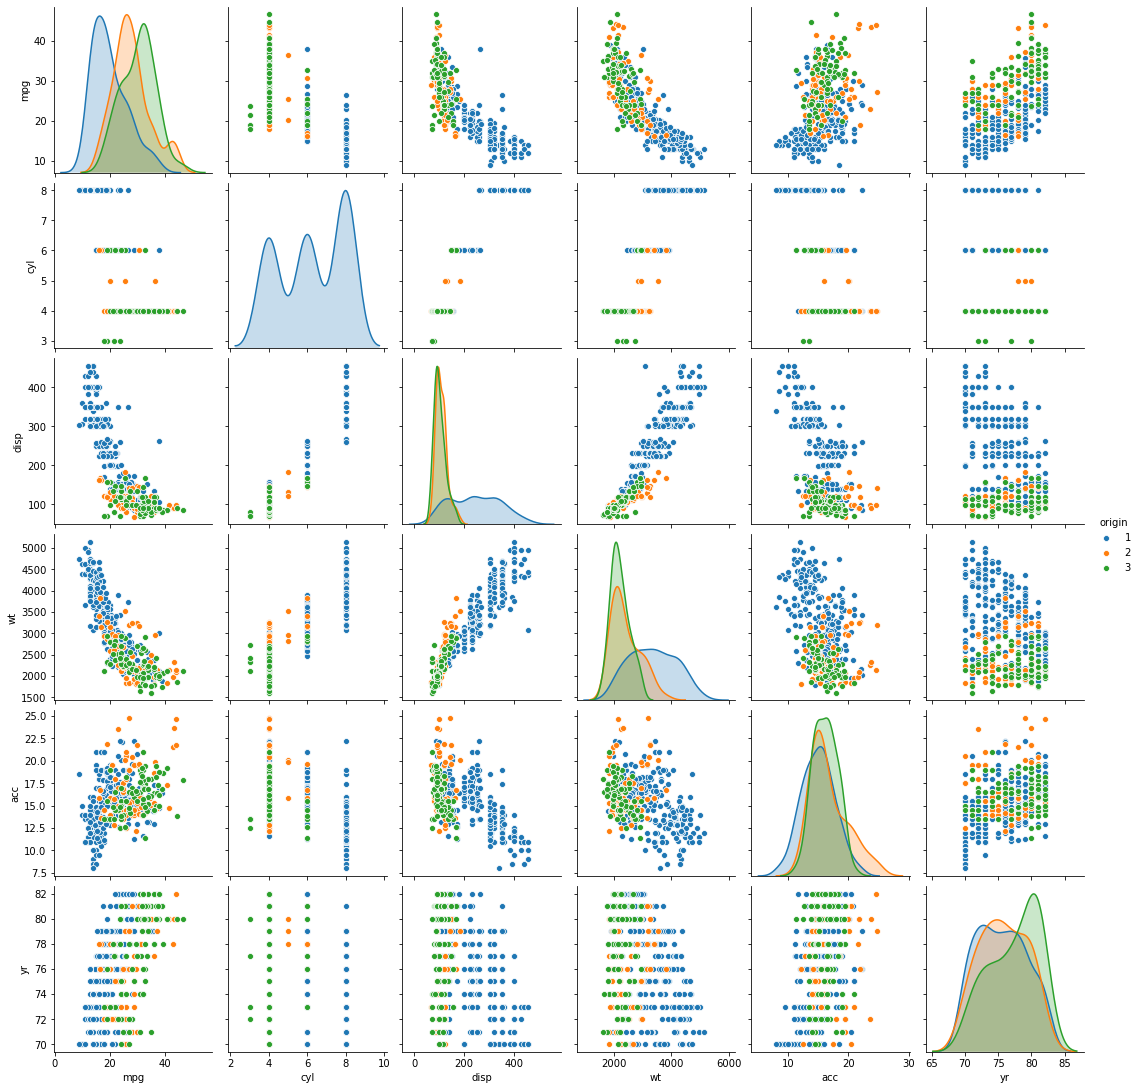

In [41]:
sns.pairplot(copy_df,hue='origin')

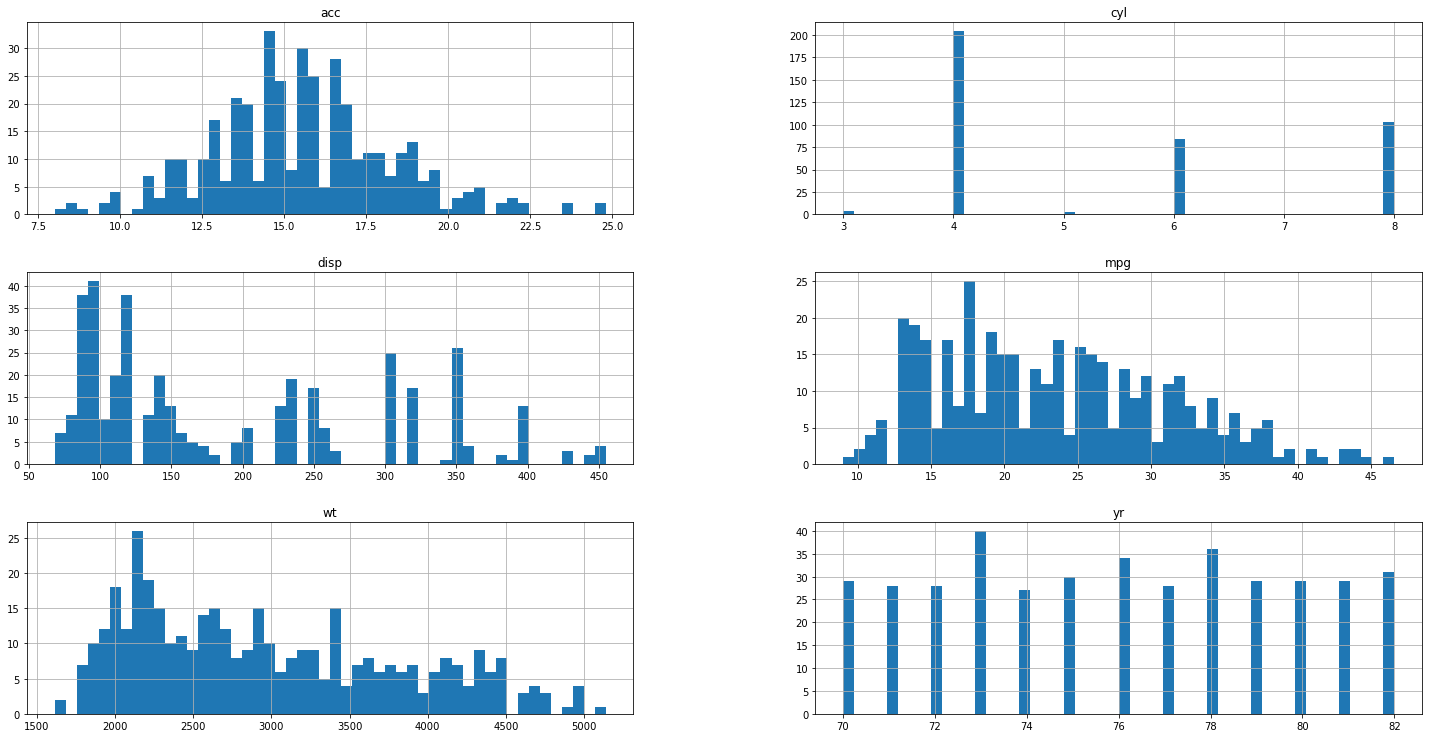

In [36]:
columns = list(copy_df)[0:-1] # Excluding Outcome column which has only 
copy_df[columns].hist(stacked=False, bins=50, figsize=(25,100), layout=(22,2)); 


In [37]:
copy_df.corr()

,mpg,cyl,disp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
wt,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [38]:
def plot_corr(copy_df, size=11):
    corr = copy_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

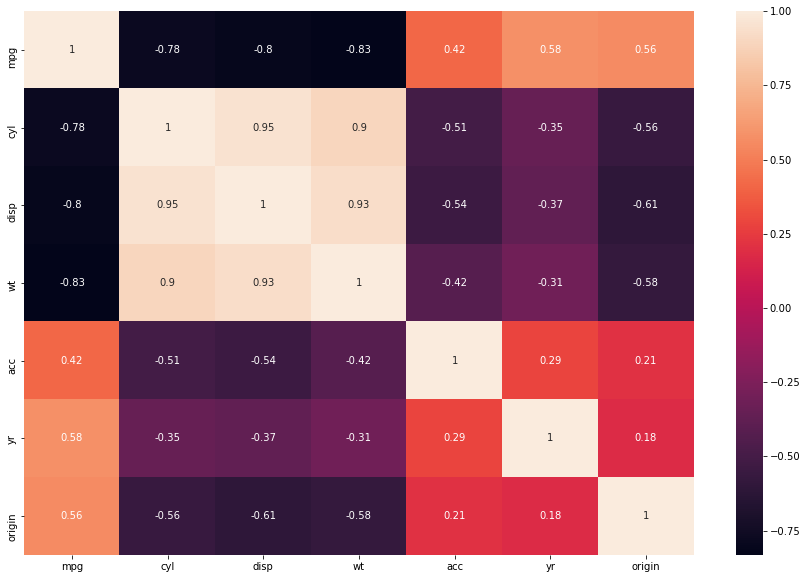

In [55]:
plt.figure(figsize = (15,10))
sns.heatmap(copy_df.corr(), annot = True )

3. Standardize the data
Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods. You can use zscore function to do this

In [40]:
copy_df_numeric_cols=copy_df.select_dtypes(include=[np.number])
from scipy.stats import zscore
df_scale=copy_df_numeric_cols.apply(zscore)
df_scale

,mpg,cyl,disp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.408411,1.100822,1.621983,-0.715145


K means Clustering

In [42]:
cluster_errors = []
X=np.array(df_scale)

Calculate errorrs for each K
Iterating values of k from 1 to 10 fit K means model Using inertia

In [43]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,max_iter=100)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1390.191027
2,3,1093.948126
3,4,897.290063
4,5,739.254640
5,6,668.082492
6,7,611.584580
7,8,568.986452
8,9,527.375155


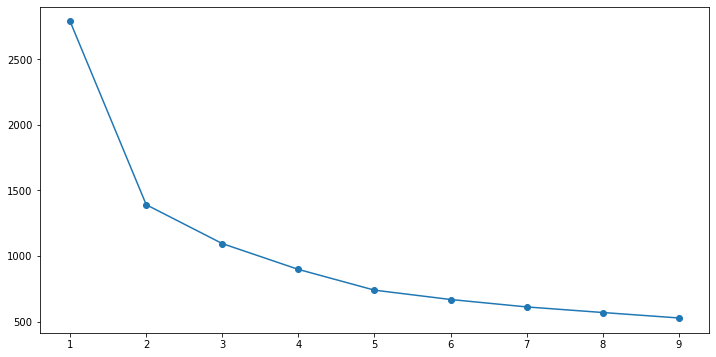

In [44]:
# Elbow plot
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

There are two bends in the elbow plot, at k=3. BUt we chall also compare with K=3 and 4. 

In [49]:
#For K=4
# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.45426881  0.27614843  0.25382303  0.29761582  0.38610946  0.04437145
  -0.66086796]
 [ 0.20681453 -0.83277545 -0.82218068 -0.76861211  0.31221501 -0.63906418
   0.67054233]
 [-1.14806725  1.49819126  1.48757601  1.38480338 -1.06230437 -0.6531617
  -0.71514478]
 [ 1.21535597 -0.80231801 -0.78374793 -0.77839791  0.33302709  1.13010028
   0.57903361]]


In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculating silhouette_score
silhouette_score(X,labels)

0.3128772518633134

Let us calculate the silhouete score for K =3 as well and chose the best criteria. 

In [51]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.20939528 -0.12474011 -0.0635226   0.01991873  0.48955312  0.10752638
  -0.60814191]
 [ 0.8886572  -0.82300201 -0.86548254 -0.87398688  0.21413347  0.29360837
   0.98074969]
 [-1.13112279  1.49819126  1.47984736  1.37550801 -1.03620867 -0.62361034
  -0.71514478]]


In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculating silhouette_score
silhouette_score(X,labels)

0.3203470780169234

Since, K=3 has a better score. three number of clusters will be chosen. 

Store the centroids in a dataframe with column names from the original dataset given

In [54]:
colnames = df_scale.columns
df_centroids=pd.DataFrame(centroids,columns=colnames)

In [55]:
df_centroids

,mpg,cyl,disp,wt,acc,yr,origin
0,-0.209395,-0.124740,-0.063523,0.019919,0.489553,0.107526,-0.608142
1,0.888657,-0.823002,-0.865483,-0.873987,0.214133,0.293608,0.980750
2,-1.131123,1.498191,1.479847,1.375508,-1.036209,-0.623610,-0.715145


In [56]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0,

In [57]:
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [58]:
X_df.head()

,mpg,cyl,disp,wt,acc,yr,origin,group
0,-0.706439,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.715145,2
1,-1.090751,1.498191,1.503514,0.854333,-1.477038,-1.627426,-0.715145,2
2,-0.706439,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.715145,2
3,-0.962647,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.715145,2
4,-0.834543,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.715145,2


D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


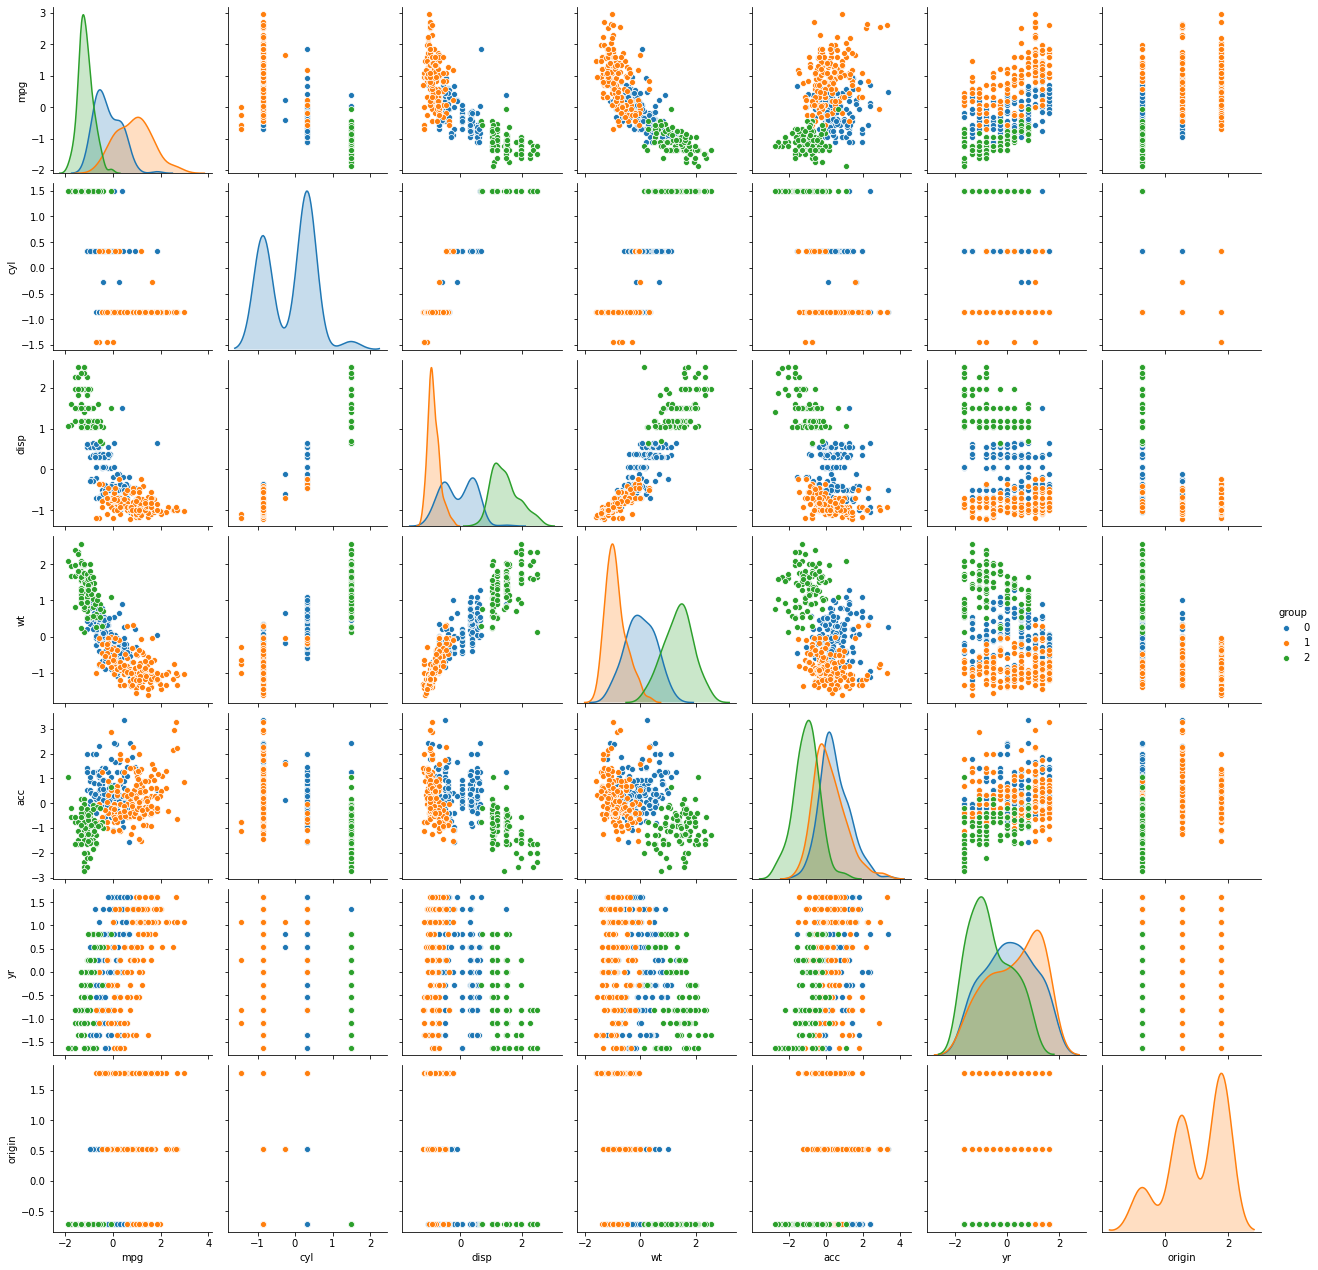

In [60]:
sns.pairplot(X_df,hue='group')

Hierarchical Clustering


In [74]:
df_H=copy_df.drop('car_name',axis=1)
df_H.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [77]:
copy_df_numeric_cols=copy_df.select_dtypes(include=[np.number])
from scipy.stats import zscore
dfH_scale=copy_df_numeric_cols.apply(zscore)
dfH_scale

,mpg,cyl,disp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.408411,1.100822,1.621983,-0.715145


In [129]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [130]:
model.fit(dfH_scale)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [131]:
copy_df['labels'] = model.labels_
copy_df.head(20)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,labels
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1,1


In [132]:
copy_dfClust = copy_df.groupby(['labels'])


In [133]:
copy_dfClust.mean()

,mpg,cyl,disp,wt,acc,yr,origin
labels,,,,,,,
0,28.495370,4.125000,113.576389,2343.907407,16.145833,77.092593,2.00463
1,16.562573,7.204678,298.754386,3770.935673,14.436257,74.409357,1.00000
2,33.781818,4.363636,124.000000,2828.636364,21.818182,79.636364,2.00000


In [127]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [118]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfH_scale, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(dfH_scale))

c

0.7016725777148463

In [119]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfH_scale, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(dfH_scale))

c

0.6749351309603661

In [120]:
Z = linkage(dfH_scale, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfH_scale))

c

0.7288266787915701

It can be seen that the best linkage technique is avergage method, the rest had a very low cophenet index.

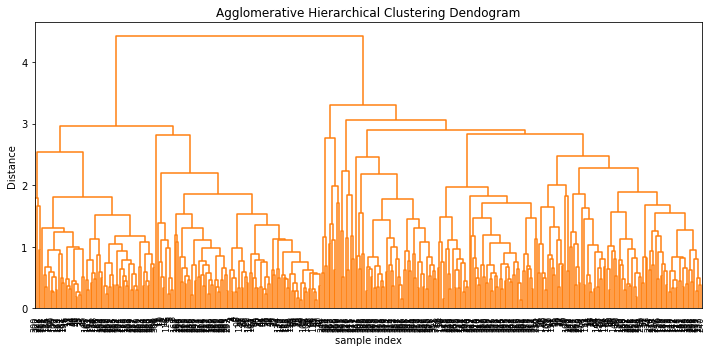

In [121]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()